In [8]:
!python -m pip install --upgrade pip   ✅  (correct)


zsh:1: number expected


In [9]:
!python -m pip install --upgrade pip
!pip install numpy
!pip install matplotlib==3.7.1
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow-macos
!pip install jupyter


  Using cached matplotlib-3.7.1-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached matplotlib-3.7.1-cp39-cp39-macosx_11_0_arm64.whl (7.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.4
    Uninstalling matplotlib-3.9.4:
      Successfully uninstalled matplotlib-3.9.4


In [16]:
!pip install "numpy<2.0"
!pip install tensorflow-macos

In [17]:
!pip uninstall -y numpy tensorflow-macos ml_dtypes
!pip install "numpy<2.0"
!pip install tensorflow-macos

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: tensorflow-macos 2.16.2
Uninstalling tensorflow-macos-2.16.2:
  Successfully uninstalled tensorflow-macos-2.16.2
Found existing installation: ml-dtypes 0.3.2
Uninstalling ml-dtypes-0.3.2:
  Successfully uninstalled ml-dtypes-0.3.2
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras 3.10.0 requires ml-dtypes, which is not installed.
tensorflow 2.16.2 requires ml-dtypes~=0.3.1, which is not installed.
  Using cached tensorflow_macos-2.16.2-cp39-cp39-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-macosx_10_9_universal2.whl.metadata (20 kB)
Using cache

In [1]:
import numpy as np
import tensorflow as tf
print("numpy:", np.__version__)
print("tensorflow:", tf.__version__)

/Users/manikandan/Desktop/nullclass_colorization/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


numpy: 1.26.4
tensorflow: 2.16.2


Import Libraries

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Input
from tensorflow.keras.optimizers import Adam

Load Preprocessed Dataset

In [20]:
def load_images(gray_path, color_path, image_size=(128, 128)):
    X, Y = [], []
    for filename in os.listdir(gray_path):
        gray_img = cv2.imread(os.path.join(gray_path, filename), cv2.IMREAD_GRAYSCALE)
        color_img = cv2.imread(os.path.join(color_path, filename))
        if gray_img is not None and color_img is not None:
            gray_img = cv2.resize(gray_img, image_size)
            color_img = cv2.resize(color_img, image_size)
            X.append(gray_img[..., np.newaxis])  # Add channel dim
            Y.append(color_img)
    return np.array(X)/255.0, np.array(Y)/255.0

gray_dir = 'data/grayscale'
color_dir = 'data/color'
X, Y = load_images(gray_dir, color_dir)
print(f"Loaded {len(X)} image pairs.")

Loaded 200 image pairs.


Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")


Training set size: 180
Validation set size: 20


Build the Model

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 1)),  # Expecting 1-channel grayscale input

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),

    layers.UpSampling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),

    layers.UpSampling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')  # Output is color image (3 channels)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 128, 128, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 740,227 (2.82 MB)

 Trainable params: 740,227 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Start Training the Model

In [25]:
# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
   epochs=25,
    batch_size=8
)


Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.3955 - loss: 0.0616 - val_accuracy: 0.3620 - val_loss: 0.0337
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3812 - loss: 0.0314 - val_accuracy: 0.3994 - val_loss: 0.0188
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4416 - loss: 0.0183 - val_accuracy: 0.3552 - val_loss: 0.0154
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.3795 - loss: 0.0166 - val_accuracy: 0.3606 - val_loss: 0.0151
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3996 - loss: 0.0154 - val_accuracy: 0.3692 - val_loss: 0.0143
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4508 - loss: 0.0150 - val_accuracy: 0.4333 - val_loss: 0.0136
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4372 - loss: 0.0133 - val_accuracy: 0.4079 - val_loss: 0.0138
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.4305 - loss: 0.0139 - val_accuracy: 0.3806 - val_loss:

Save the model

In [26]:
model.save("colorization_model.h5")


Visualize predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


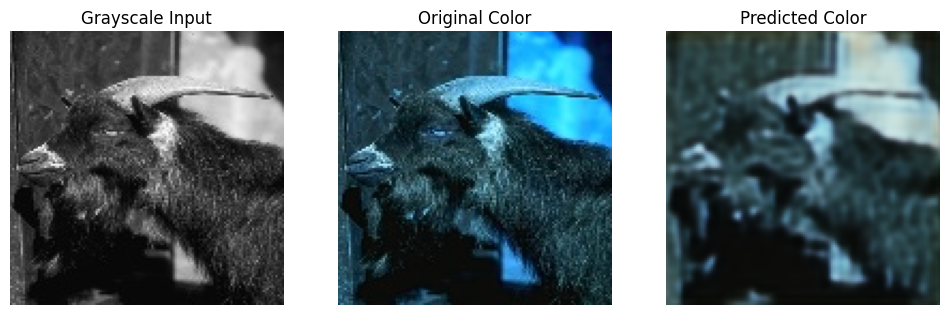

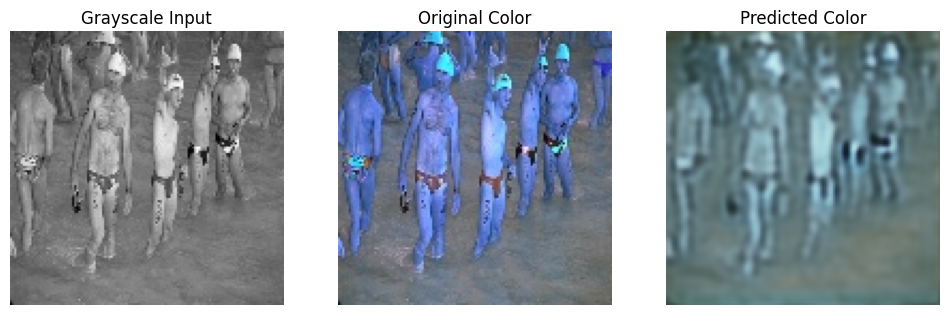

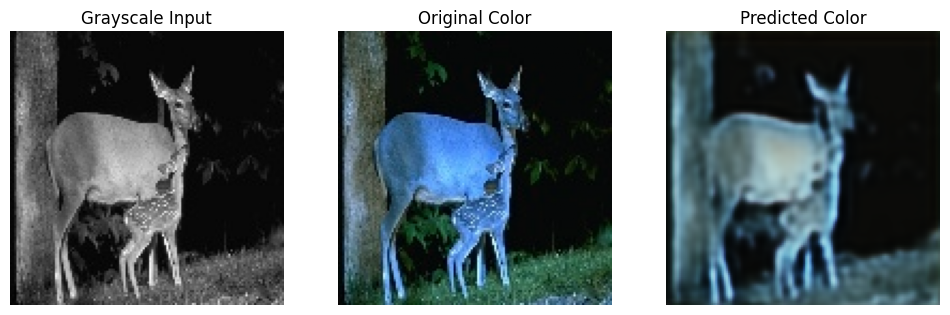

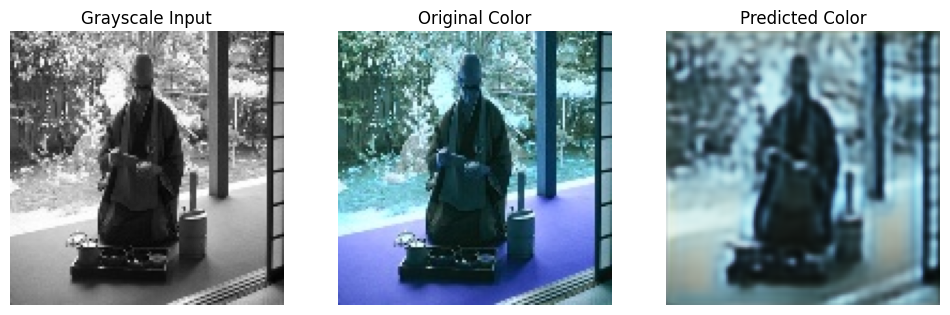

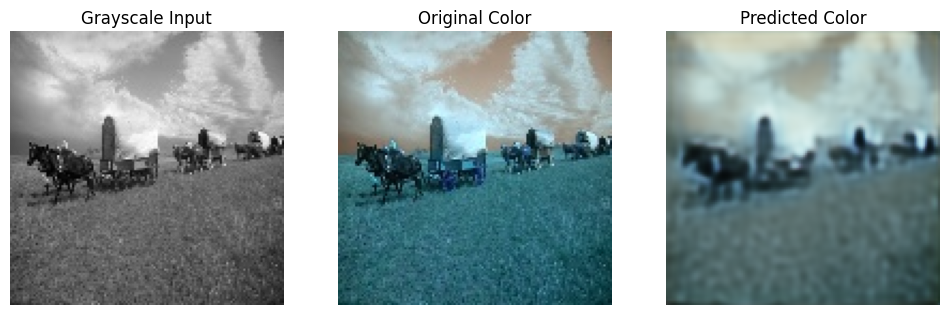

In [27]:
import matplotlib.pyplot as plt

preds = model.predict(X_val[:5])

for i in range(5):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(X_val[i].reshape(128, 128), cmap='gray')
    plt.title("Grayscale Input")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(Y_val[i])
    plt.title("Original Color")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(preds[i])
    plt.title("Predicted Color")
    plt.axis('off')

    plt.show()
